<a href="https://colab.research.google.com/github/Njeri-Gitome/Telco_Customer_Churn_Model/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
#Loading data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Telco_Churn/Telco-Customer-Churn.csv')

In [155]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [156]:
# Display columns in the dataset
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Variable Definition
- **CustomerID**: A unique ID that identifies each customer<br>
- **Gender**: The customer's gender: Male,Female<br>
- **SeniorCitizen**: Indicates if a customer is 65 or older: 0,1<br>
- **Partner** Indicates if a customer is married: Yes, No<br>
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be childrn, parents, grandparenets etc.<br>
- **tenure**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified about.<br>
- **PhoneService**: Indicates if the customer subscribes to home phone service with the company: Yes, No<br>
- **MultipleLines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No<br>
- **InternetService**: Indicates if the customer subscribes to Internet service with the company: Yes, No <br>
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No<br>
- **OnlineBackup**: Indicates if the customer subscribes to an additi0nal online backup service provided by the company: Yes,No<br>
- **DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No<br>
- **TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No<br>
- **StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service<br>
- **StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.<br>
- **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.<br>
- **PaperlessBilling**: Indicates if the customer has chosen paperless billing: Yes, No<br>
- **PaymentMethod**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check<br>
- **MonthlyCharges**:  Indicates the customer’s current total monthly charge for all their services from the company<br>
- **TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.<br>
- **Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company.<br>

## Data Inspection

In [157]:
data.shape

(7043, 21)

Our dataset has 7043 rows and 21 columns

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [159]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [160]:
'''
The TotalCharges column is numerical hence the need to convert the data type from object to numerical
'''
def convert_total_charges_to_float(data):
  # Replace empty string with Nan
  data['TotalCharges'] =data['TotalCharges'].replace('',np.nan)

  # Convert the string variables to numeric
  data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors ='coerce')


# function call
convert_total_charges_to_float(data)

errors='coerce' to coerce non-numeric values to NaN, and then replaces NaN values with np.nan.

In [161]:
# Numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
print('Numerical columns: ',numerical_cols)

Numerical columns:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


The Senior Citizen is a numerical column, however it contains nominal data. The values are either 0 or 1 meaning: <br>
- 0 : not a senior citizen<br>
- 1 : is a senior citizen<br>

Hence this column is best represented as a categorical column

In [162]:
# Categorical columns
categorical_cols = data.select_dtypes(include =['object']).columns
print('Categorical columns: ',categorical_cols)

Categorical columns:  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [163]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


## Data Cleaning

In [164]:
# Check for missing values
missing = data.isnull().sum()
missing

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are no missing values in the dataset

In [165]:
# Check for duplicates
duplicates = data.duplicated().sum()
duplicates

0

There are no duplicates in the dataset

In [166]:
#Checking for outliers
'''
Explore outliers in the numerical columns using boxplots.
'''
import plotly.express as px
px.box(data, x ='tenure')

The tenure column does not have outliers.

In [167]:
px.box(data, x='MonthlyCharges')

The Monthly Charges column does not have outliers.

In [168]:
px.box(data, x='TotalCharges')

The Total Charges column does not contain outliers.

## Data Visualization and Analysis

In [169]:
df = data.copy()

#Drop the CustomerID column
df.drop(['customerID'], inplace =True, axis =1)

### Countplots

In [170]:
'''
Count plot for columns with 5 and less unique values to allow easier visualization
'''
def plot_countplots(dataframe):
    # Iterate over each column in the DataFrame
    for col in dataframe.columns:
        # Check if the column has 5 or few unique variables
        unique_values =dataframe[col].nunique()
        if unique_values <= 5:
          # Plot count plot for each column
          plt.figure(figsize=(10, 6))
          sns.countplot(data =dataframe, x= col)
          plt.title(f'Countplot for {col}')
          plt.show()

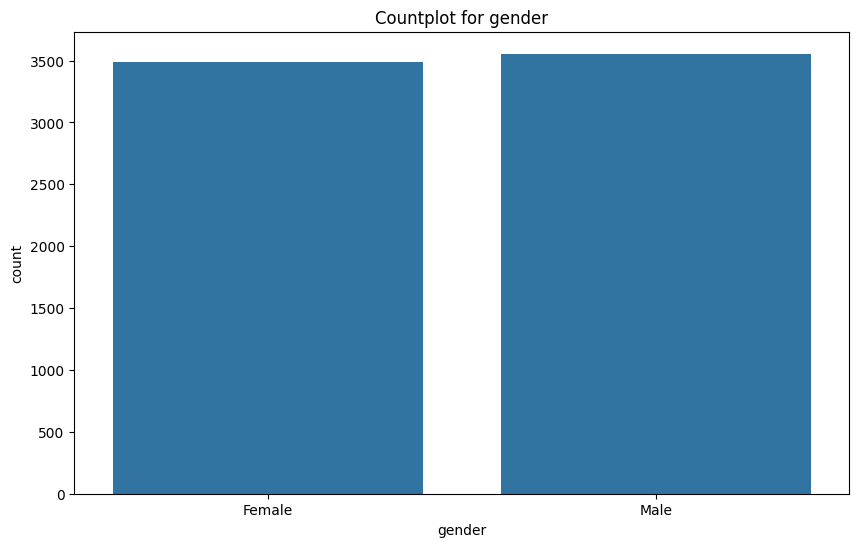

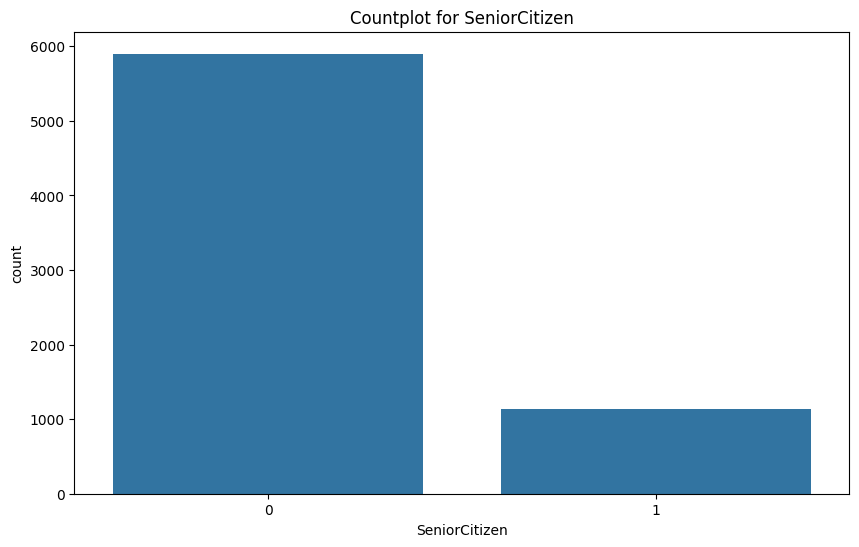

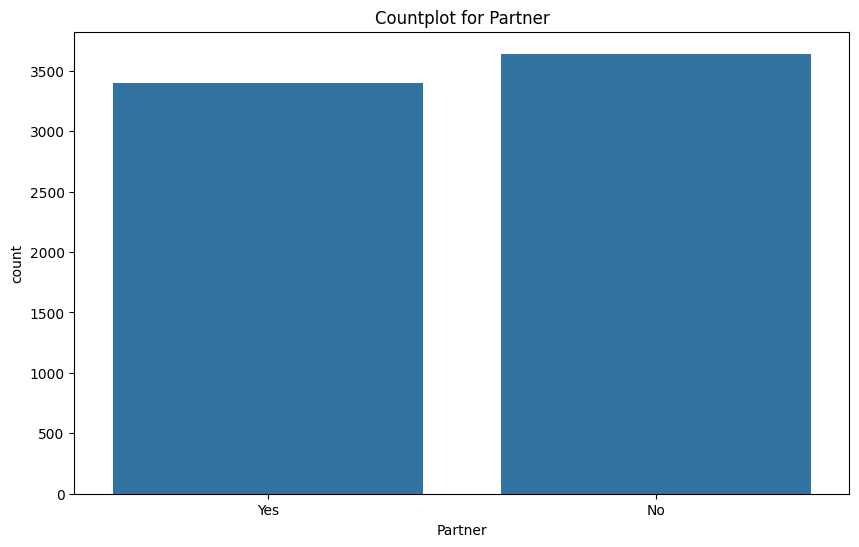

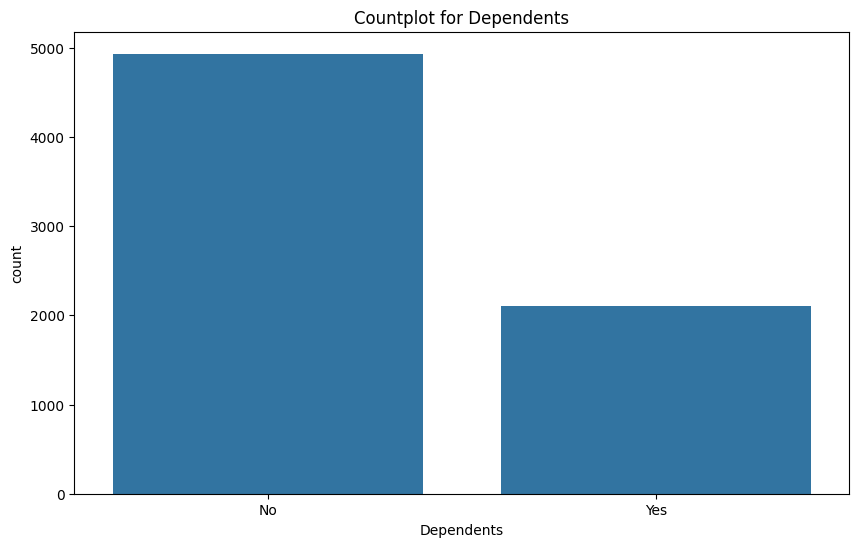

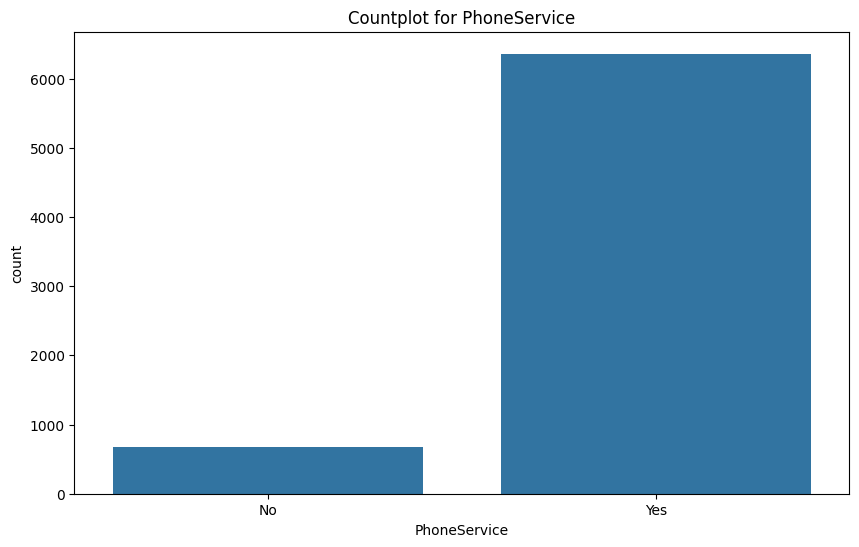

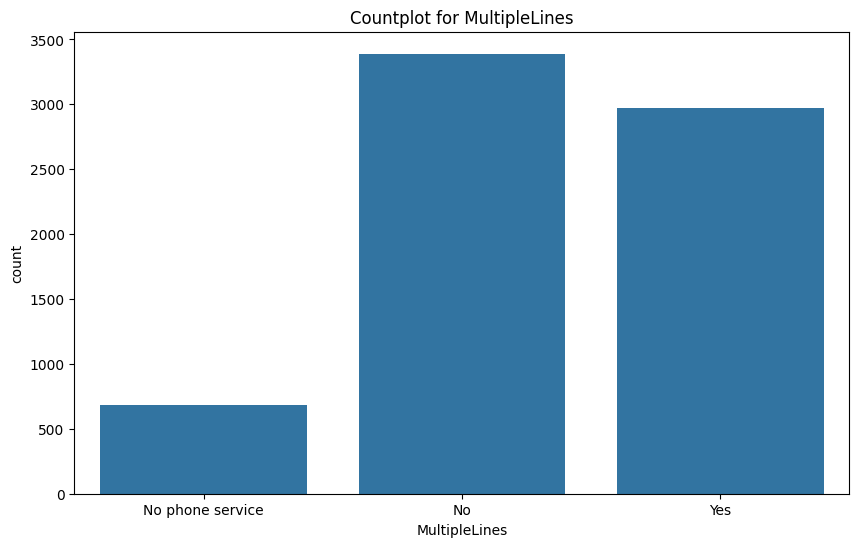

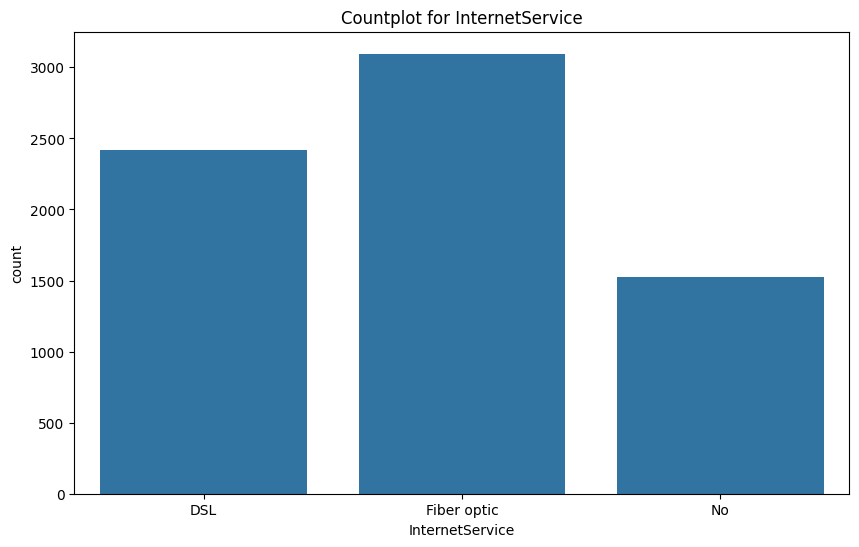

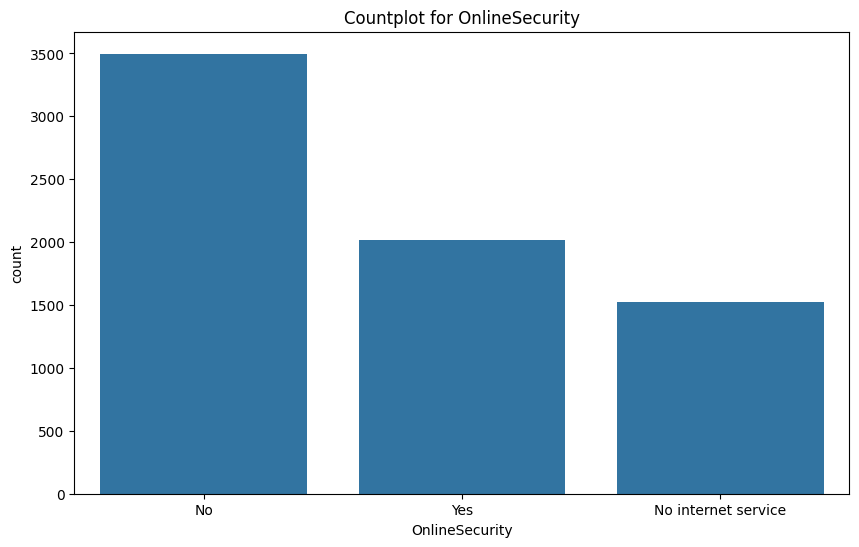

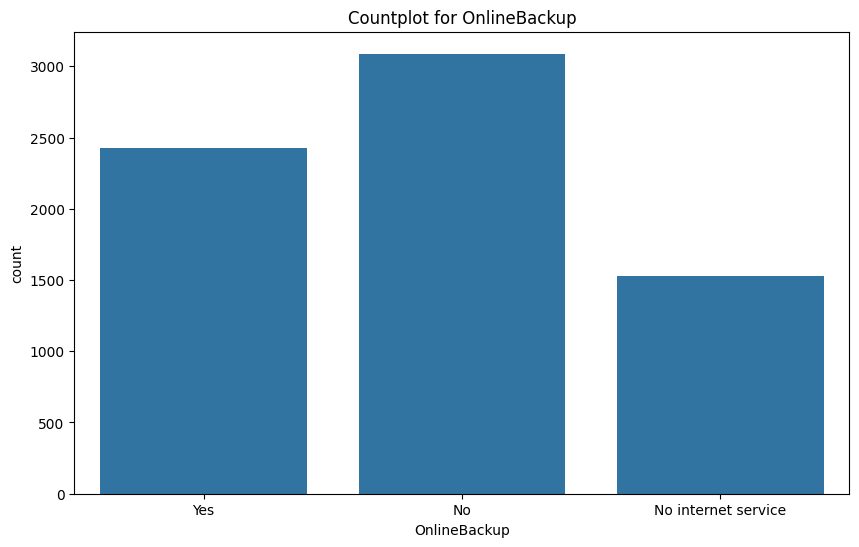

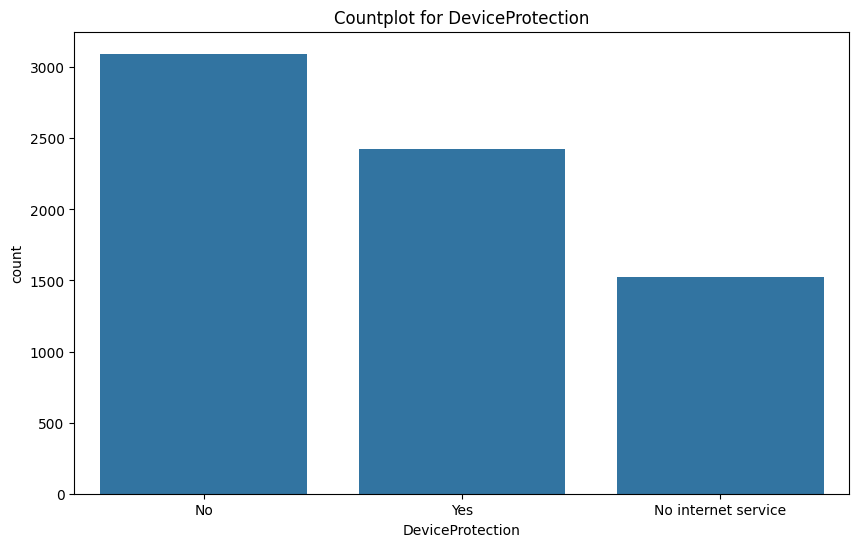

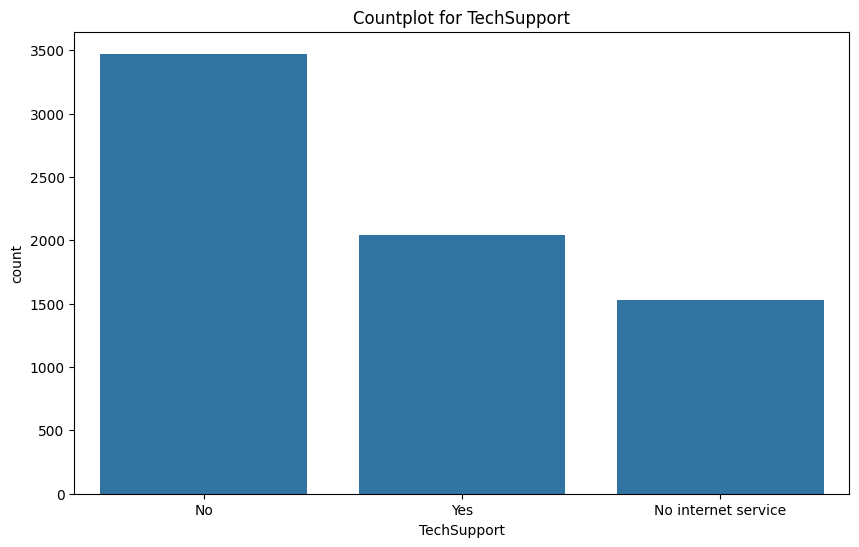

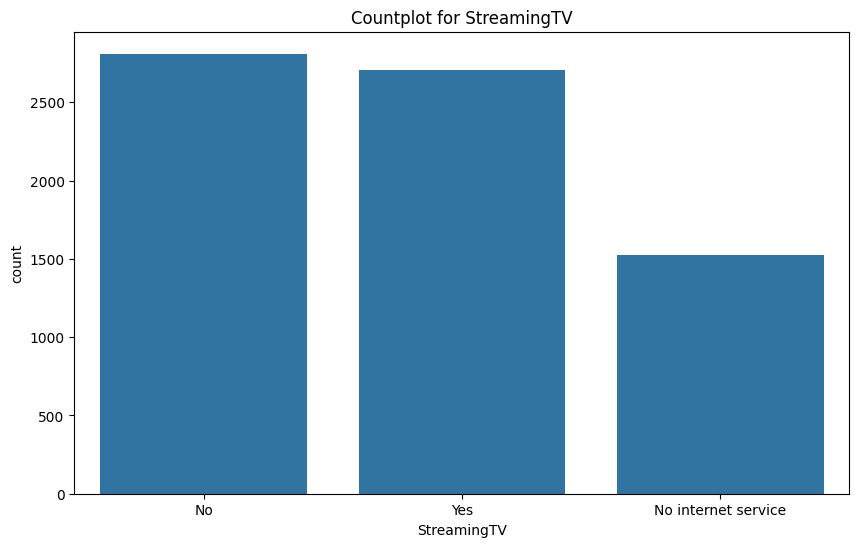

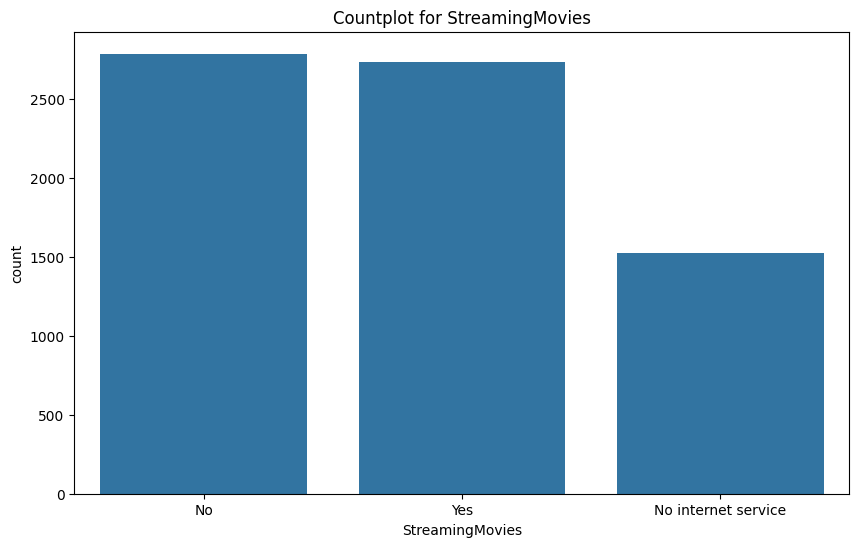

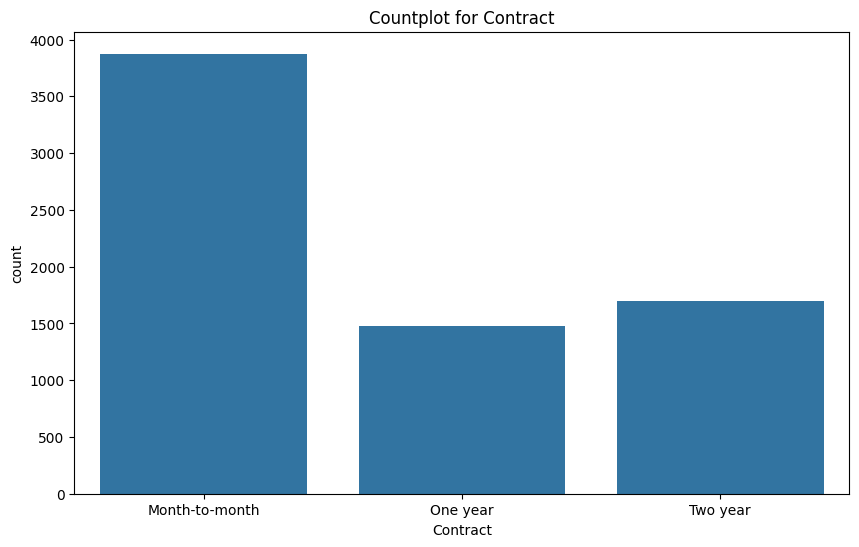

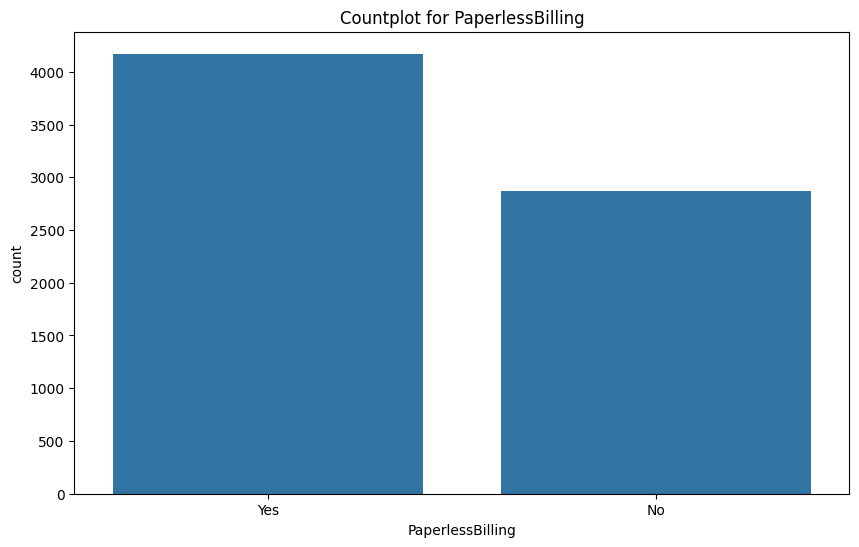

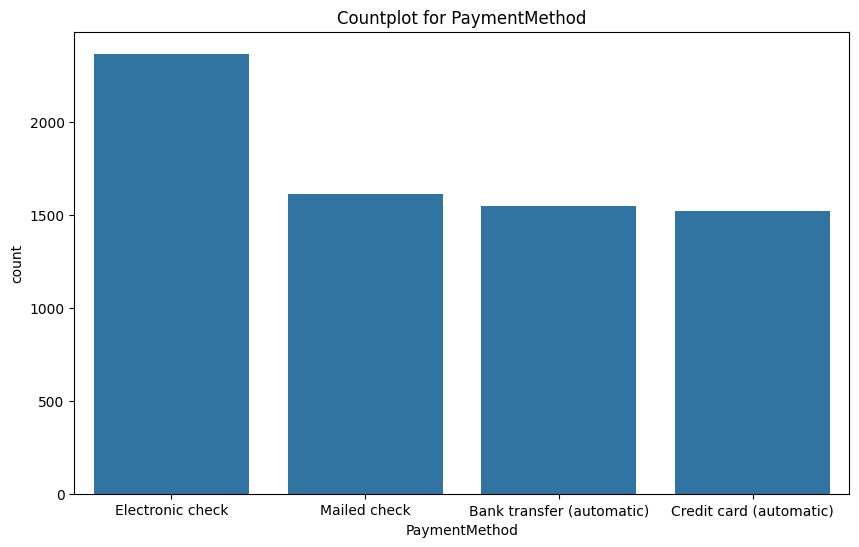

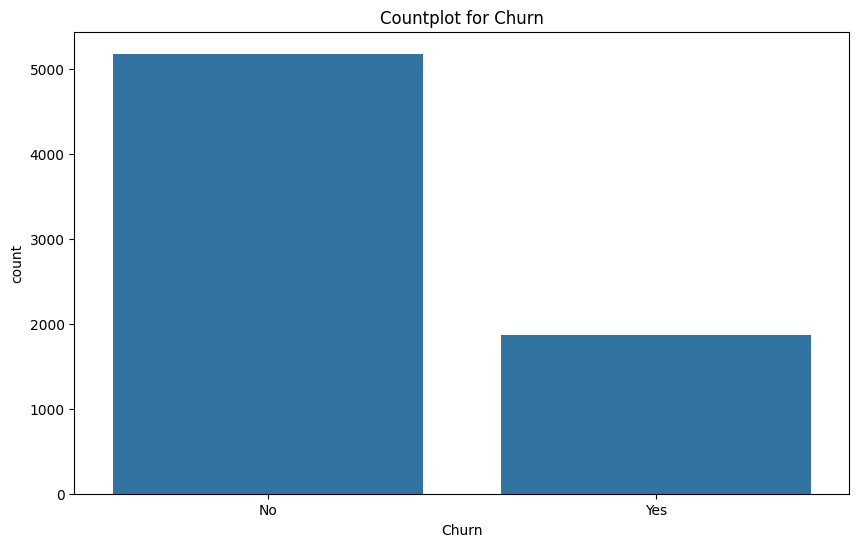

In [172]:
plot_countplots(df)

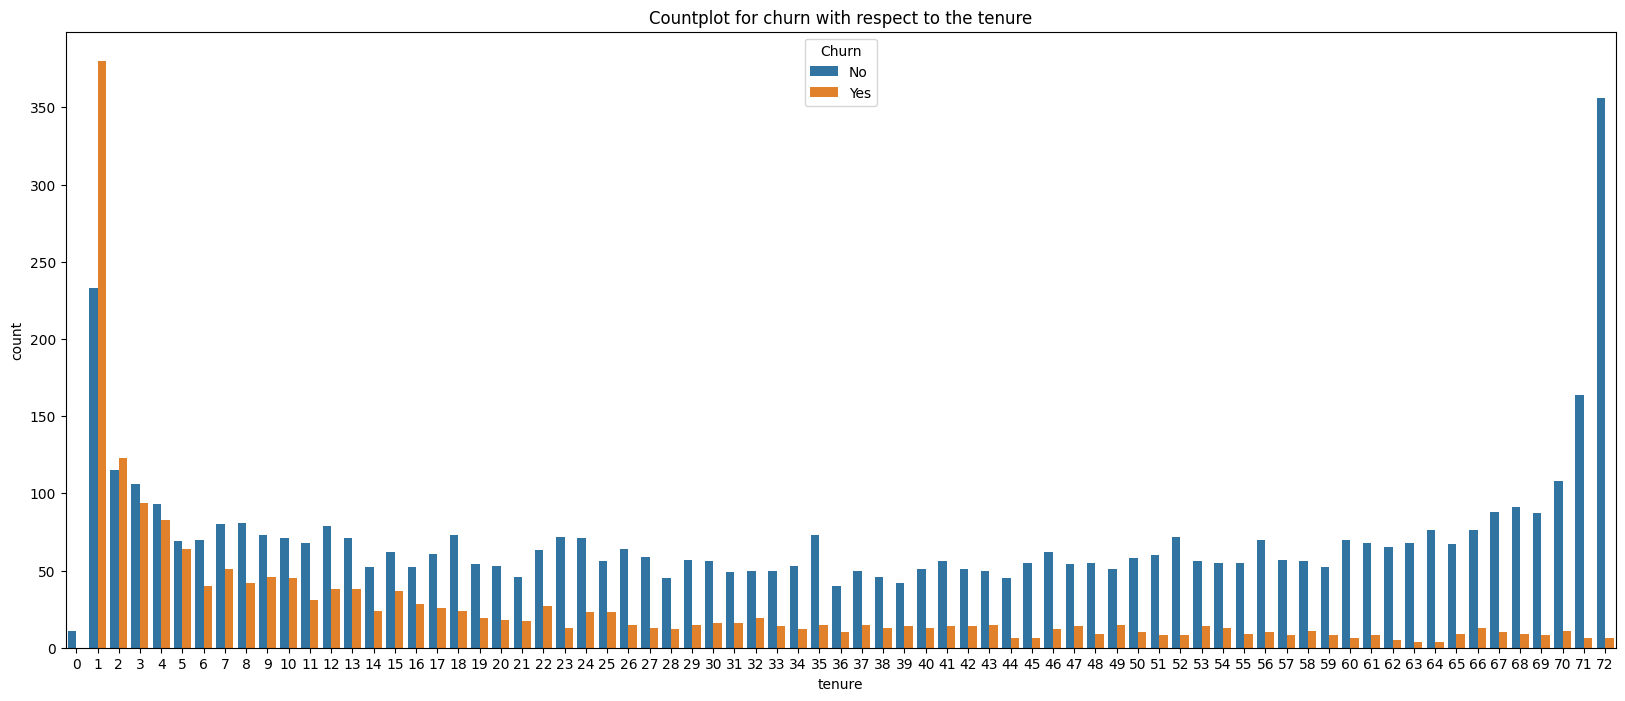

In [195]:
# Countplot for churn with respect to the tenure
plt.figure(figsize=(20,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.title('Countplot for churn with respect to the tenure')
plt.show()

*Interpretation*:<br>
The higher the tenure, the less the churn

In [201]:
#Determine the range of values in the tenure column

min_value = df['tenure'].min()
max_value = df['tenure'].max()

print('The minimum value is',min_value)
print('The maximum value is',max_value)

The minimum value is 0
The maximum value is 72


In [204]:
# Converting the tenure into subgroups to reduce complexity
def tenure_subgroups(tenure):
  if tenure <= 9:
    return 1
  elif tenure >9 and tenure <=18:
    return 2
  elif tenure >18 and tenure <=27:
    return 3
  elif tenure >27 and tenure <=36:
    return 4
  elif tenure >36 and tenure <=45:
    return 5
  elif tenure >45 and tenure <=54:
    return 6
  elif tenure >54 and tenure <=63:
    return 7
  else:
    return 8

#Function call
df["tenure_group"]=df["tenure"].apply(lambda x: tenure_subgroups(x))


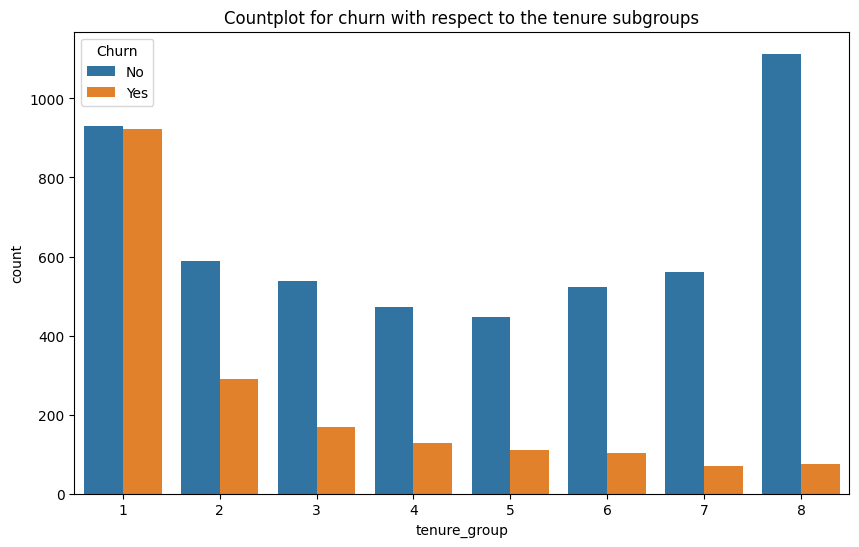

In [209]:
# Countplot for churn with respect to the tenure subgroups
plt.figure(figsize=(10,6))
sns.countplot(x="tenure_group", hue="Churn", data=df)
plt.title('Countplot for churn with respect to the tenure subgroups')
plt.show()

Same observation as above however the groupings reduce the dimensionality of the data for easier readability

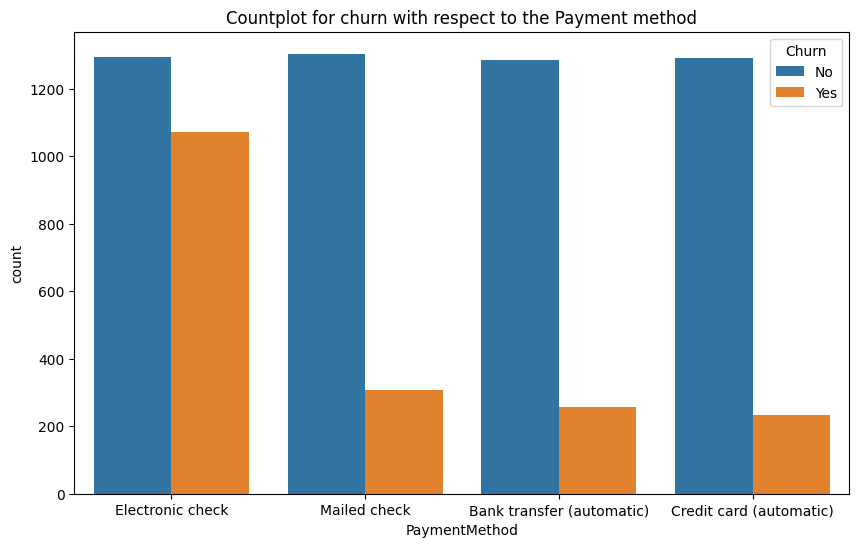

In [210]:
# Countplot for churn with respect to the tenure
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title('Countplot for churn with respect to the Payment method')
plt.show()

Interpretation<br>
Electronic check payment method has the highest likelihood for custmer churn

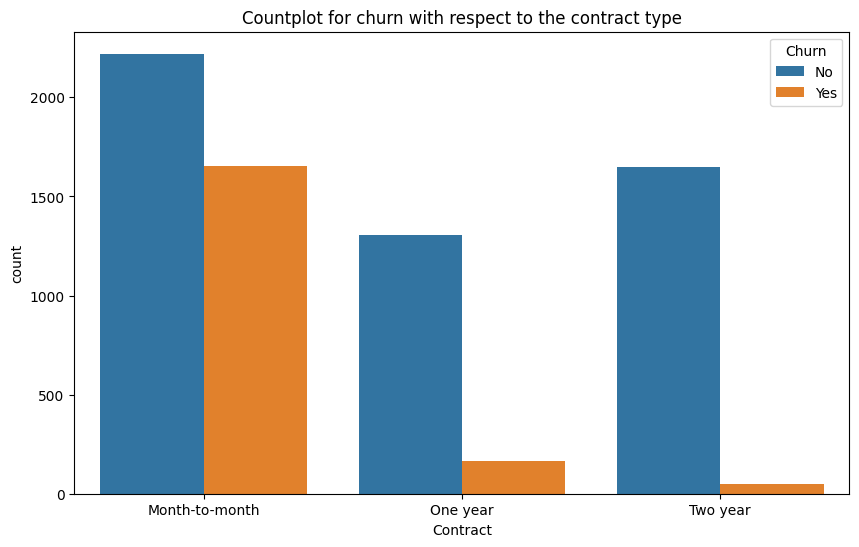

In [215]:
# Countplot for churn with respect to the contract type
plt.figure(figsize=(10,6))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title('Countplot for churn with respect to the contract type')
plt.show()

Interpration:<br>
The longer the contract duration the less the churn rate

### Kernel Density Estimation (KDE) plots

In [216]:
# Dataframes with the churn and not churn data
Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

In [226]:
Churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,4
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,6


In [229]:
Not_Churn.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4


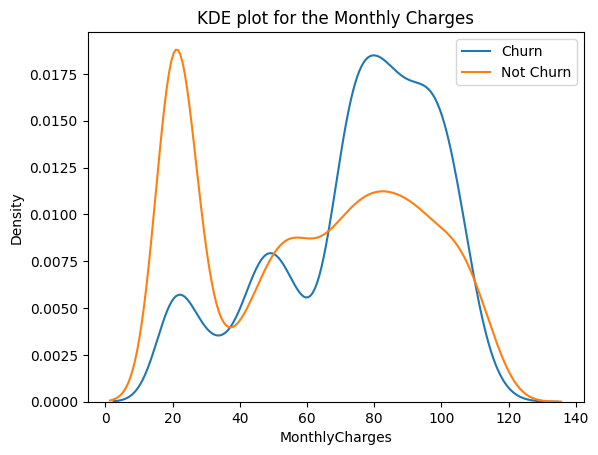

In [219]:
#KDE plot for monthly charges
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")
plt.title('KDE plot for the Monthly Charges')
plt.legend()

Interpretation:<br>
The lower the monthly charges, the higher the customer retention. The higher the monthly charges, the higher the customer churn

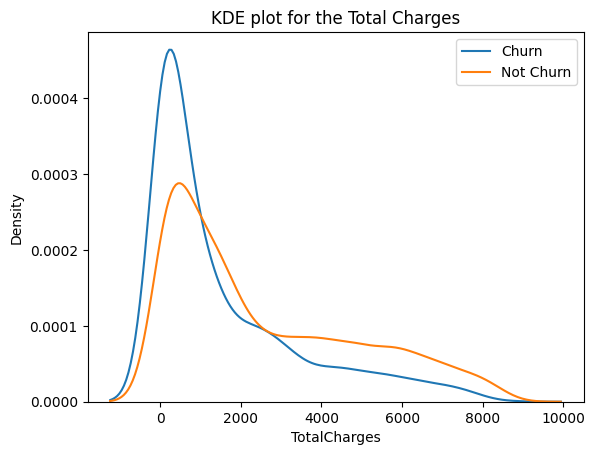

In [222]:
#KDE plot for Total charges
sns.kdeplot(Churn["TotalCharges"], label = "Churn")
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn")
plt.title('KDE plot for the Total Charges')
plt.legend()

Interpretation:<br>
The higher the total charges the higher the churn

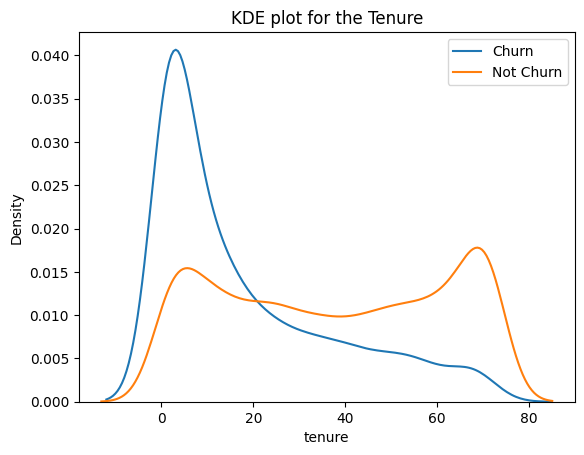

In [223]:
#KDE plot for Tenure
sns.kdeplot(Churn["tenure"], label = "Churn")
sns.kdeplot(Not_Churn["tenure"], label = "Not Churn")
plt.title('KDE plot for the Tenure')
plt.legend()

The longer the tenure the less the churn

### Histogram

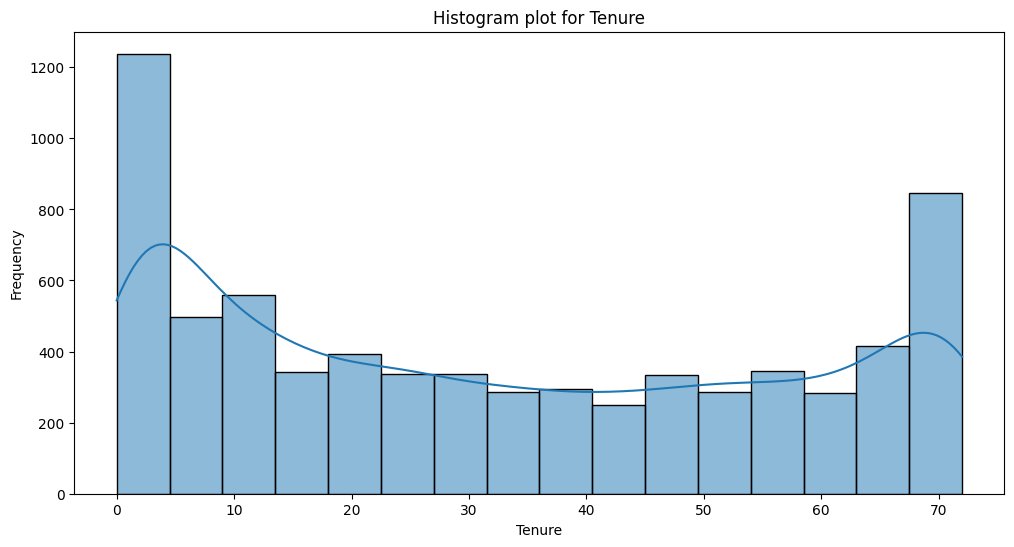

In [173]:
# Histogram for Tenure
plt.figure(figsize= (12,6))
sns.histplot(data=df,x='tenure',kde =True)
plt.title(f'Histogram plot for Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

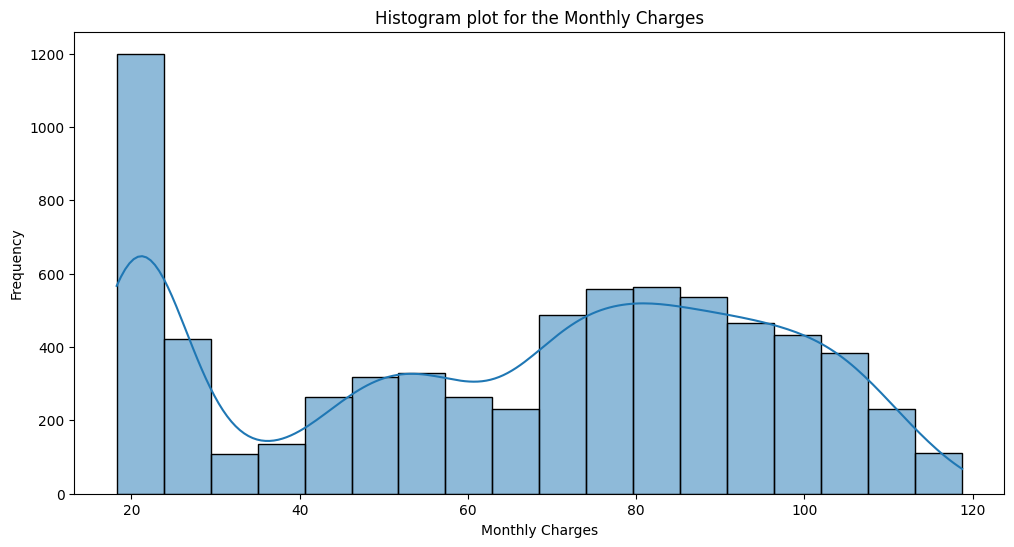

In [176]:
# Histogram for Monthly Charges
plt.figure(figsize= (12,6))
sns.histplot(data=df,x='MonthlyCharges',kde =True)
plt.title(f'Histogram plot for the Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

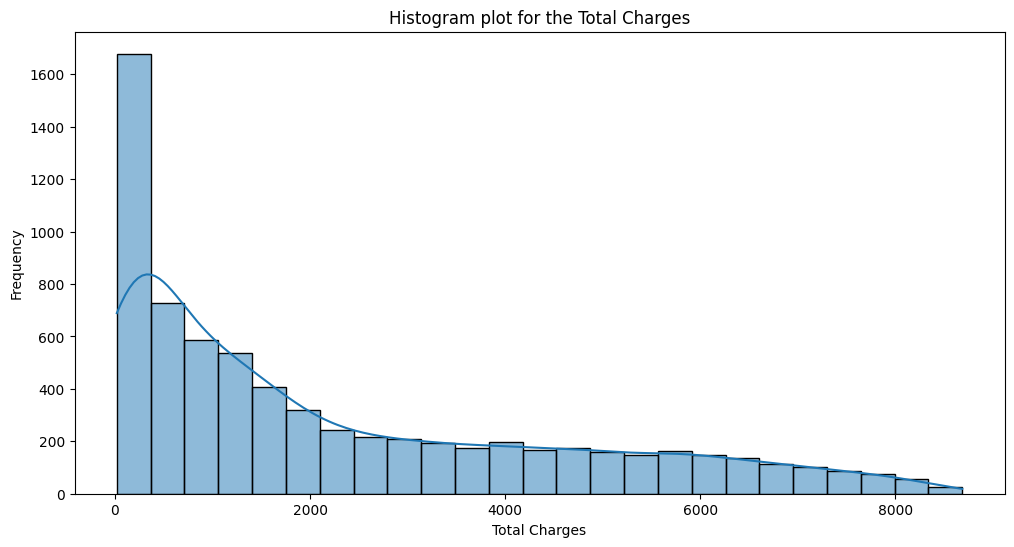

In [177]:
# Histogram for Total Charges
plt.figure(figsize= (12,6))
sns.histplot(data=df,x='TotalCharges',kde =True)
plt.title(f'Histogram plot for the Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

The histogram is rightly skewed

### Correlation plot

In [190]:
#Covert SeniorCitizen column to categorical since it contains nominal data
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [187]:
def correlation_plot(dataframe):
    """
    Function to create a correlation plot for numerical columns in a DataFrame
    """
    # Select numerical columns
    numerical_columns = dataframe.select_dtypes(include=['number'])

    # Calculate the correlation matrix
    correlation_matrix = numerical_columns.corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Plot of Numerical Columns')
    plt.show()

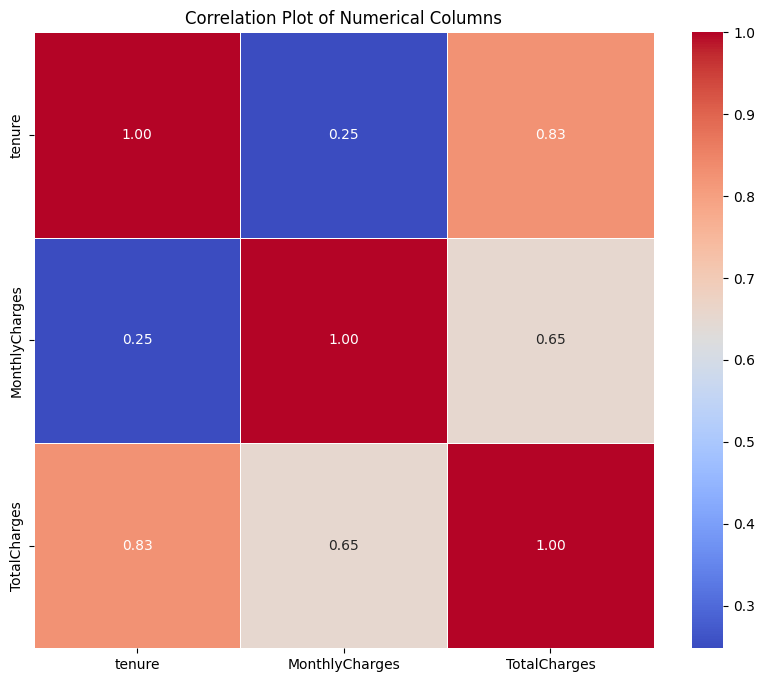

In [191]:
correlation_plot(df)